## Install Detectron

### Install Cython, Pyyam and nvidial-ml-py3


```shell
$ pip install --upgrade pip
	
$ pip install -q cython pyyaml==5.1 nvidia-ml-py3
```

### Install Pycocotools

```shell

$ pip install -U git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI

```


### Check CUDA version

```shell
$ nvcc --version
(pytorch_p36) [ec2-user@ip-172-16-30-5 ObjectDetection_Detectron]$ nvcc --version
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018

```




In this case it's CUDA 10.1

Find the corresponding version of detectron2 prebuilt installation and run

```shell
$ pip install detectron2 -f  https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.4/index.html
```

### Detect installation environment for detectron once installed

```shell
 python -m detectron2.utils.collect_env.
/home/ec2-user/anaconda3/envs/pytorch_p36/bin/python: Error while finding module specification for 'detectron2.utils.collect_env.' (AttributeError: module 'detectron2.utils.collect_env' has no attribute '__path__')
(pytorch_p36) [ec2-user@ip-172-16-30-5 ObjectDetection_Detectron]$ python -m detectron2.utils.collect_env
----------------------  ----------------------------------------------------------------------------------------
sys.platform            linux
Python                  3.6.10 |Anaconda, Inc.| (default, Mar 25 2020, 23:51:54) [GCC 7.3.0]
numpy                   1.18.1
detectron2              0.1.3 @/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/detectron2
detectron2._C           failed to import
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.4.0 @/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch
PyTorch debug build     False
CUDA available          True
GPU 0                   Tesla K80
CUDA_HOME               /usr/local/cuda-10.1
NVCC                    Cuda compilation tools, release 10.1, V10.1.243
Pillow                  7.0.0
torchvision             0.5.0 @/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torchvision
torchvision arch flags  sm_35, sm_50, sm_60, sm_70, sm_75
fvcore                  0.1.1.post20200608
cv2                     4.2.0
----------------------  ----------------------------------------------------------------------------------------
PyTorch built with:
  - GCC 7.3
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v0.21.1 (Git Hash 7d2fd500bc78936d1d648ca713b901012f470dbc)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CUDA Runtime 10.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_37,code=compute_37
  - CuDNN 7.6.3
  - Magma 2.5.1
  - Build settings: BLAS=MKL, BUILD_NAMEDTENSOR=OFF, BUILD_TYPE=Release, CXX_FLAGS= -Wno-deprecated -fvisibility-inlines-hidden -fopenmp -DUSE_FBGEMM -DUSE_QNNPACK -DUSE_PYTORCH_QNNPACK -O2 -fPIC -Wno-narrowing -Wall -Wextra -Wno-missing-field-initializers -Wno-type-limits -Wno-array-bounds -Wno-unknown-pragmas -Wno-sign-compare -Wno-unused-parameter -Wno-unused-variable -Wno-unused-function -Wno-unused-result -Wno-strict-overflow -Wno-strict-aliasing -Wno-error=deprecated-declarations -Wno-stringop-overflow -Wno-error=pedantic -Wno-error=redundant-decls -Wno-error=old-style-cast -fdiagnostics-color=always -faligned-new -Wno-unused-but-set-variable -Wno-maybe-uninitialized -fno-math-errno -fno-trapping-math -Wno-stringop-overflow, DISABLE_NUMA=1, PERF_WITH_AVX=1, PERF_WITH_AVX2=1, PERF_WITH_AVX512=1, USE_CUDA=ON, USE_EXCEPTION_PTR=1, USE_GFLAGS=OFF, USE_GLOG=OFF, USE_MKL=ON, USE_MKLDNN=ON, USE_MPI=OFF, USE_NCCL=ON, USE_NNPACK=ON, USE_OPENMP=ON, USE_STATIC_DISPATCH=OFF,

```

Try 

```python
import torch, torchvision
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2 import model_zoo
```






### Object detection application

In [1]:
import detectron2


In [2]:
import torch, torchvision
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor, DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.structures import BoxMode
from detectron2.evaluation import COCOEvaluator

In [3]:
import glob
import os
import ntpath
import numpy as np

import cv2
import random
import itertools
import pandas as pd
from tqdm import tqdm
import urllib
import json
import PIL.Image as Image


import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc




In [4]:
from fastai.core import Path, download_url
from fastai.vision.image import show_all, show_image, show_multi

In [5]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE =  ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE)) 
rcParams['figure.figsize'] = 12, 8 


RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [6]:
ROOT_PATH = Path('.')
DATA_PATH = Path(ROOT_PATH/'data')
MODEL_PATH = Path(ROOT_PATH/'model')
FACES_PATH = Path(DATA_PATH/'faces')

FACES_PATH.mkdir(exist_ok=True)


In [7]:
ANNOTATIONS_PATH = Path(DATA_PATH/'annotations.csv')

In [8]:
ROOT_PATH.ls()

[PosixPath('output'),
 PosixPath('Detectron.ipynb'),
 PosixPath('.ipynb_checkpoints'),
 PosixPath('model'),
 PosixPath('data')]

In [10]:
! wget https://drive.google.com/uc?id=1K79wJgmPTWamqb04Op2GxW0SW9oxw8KS -O data/face_detection.json

--2020-06-08 09:01:47--  https://drive.google.com/uc?id=1K79wJgmPTWamqb04Op2GxW0SW9oxw8KS
Resolving drive.google.com (drive.google.com)... 172.217.3.206, 2607:f8b0:400a:809::200e
Connecting to drive.google.com (drive.google.com)|172.217.3.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ufhhebrku8upfq6gp9326t665in0j7f4/1591606875000/01328360181817234523/*/1K79wJgmPTWamqb04Op2GxW0SW9oxw8KS [following]
--2020-06-08 09:01:47--  https://doc-04-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ufhhebrku8upfq6gp9326t665in0j7f4/1591606875000/01328360181817234523/*/1K79wJgmPTWamqb04Op2GxW0SW9oxw8KS
Resolving doc-04-64-docs.googleusercontent.com (doc-04-64-docs.googleusercontent.com)... 172.217.3.193, 2607:f8b0:400a:803::2001
Connecting to doc-04-64-docs.googleusercontent.com (doc-04-64-docs.googleusercontent.com)|172.217.3.193|:443

In [9]:
DATA_PATH.ls()

[PosixPath('data/annotations.csv'),
 PosixPath('data/face_detection.json'),
 PosixPath('data/faces')]

In [10]:
ROOT_PATH.ls()

[PosixPath('output'),
 PosixPath('Detectron.ipynb'),
 PosixPath('.ipynb_checkpoints'),
 PosixPath('model'),
 PosixPath('data')]

### Read the faces JSON file

In [15]:
faces_df = pd.read_json(DATA_PATH/'face_detection.json', lines=True)
faces_df.head()

content  \
0  http://com.dataturks.a96-i23.open.s3.amazonaws...   
1  http://com.dataturks.a96-i23.open.s3.amazonaws...   
2  http://com.dataturks.a96-i23.open.s3.amazonaws...   
3  http://com.dataturks.a96-i23.open.s3.amazonaws...   
4  http://com.dataturks.a96-i23.open.s3.amazonaws...   

                                          annotation  extras  
0  [{'label': ['Face'], 'notes': '', 'points': [{...     NaN  
1  [{'label': ['Face'], 'notes': '', 'points': [{...     NaN  
2  [{'label': ['Face'], 'notes': '', 'points': [{...     NaN  
3  [{'label': ['Face'], 'notes': '', 'points': [{...     NaN  
4  [{'label': ['Face'], 'notes': '', 'points': [{...     NaN

In [18]:
faces_df.iloc[0]['annotation']

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384601, 'y': 0.306306306306306},
   {'x': 0.17230769230769202, 'y': 0.45345345345345306}],
  'imageWidth': 650,
  'imageHeight': 333},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.291291291291291},
   {'x': 0.6584615384615381, 'y': 0.468468468468468}],
  'imageWidth': 650,
  'imageHeight': 333}]

### Download the images in the `face_detection.json` file into the faces folder

In [29]:
sample_url = faces_df.iloc[0]['content']; 
print(sample_url)
file_name = sample_url.split('/')[-1]
print(file_name)

http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb064277d86016431e33e4e003d/8186c3d1-e9d4-4550-8ec1-a062a7628787___0-26.jpg.jpeg
8186c3d1-e9d4-4550-8ec1-a062a7628787___0-26.jpg.jpeg


In [48]:
def download_and_save(img_url, image_name, default_path=FACES_PATH): 
    download_url(img_url, dest=Path(default_path/f'{image_name}'), overwrite=False, show_progress=False)    

def int_round(v): return int(round(v))

In [49]:
dataset = []

for index, row in tqdm(faces_df.iterrows(), total=faces_df.shape[0]):
    image_url = row['content']
    image_name = f'faces_{index}.jpeg'
    download_and_save(image_url, image_name)
    
    annotations = row['annotation']
    
    for an in annotations:
        data = {}
        points = an['points']
        
        data['file_name'] = image_name
        width = data['width'] = an['imageWidth']
        height = data['height'] = an['imageHeight']
        
        data['x_min'] = int_round(points[0]['x'] * width )
        data['y_min'] = int_round(points[0]['y'] * height)
        data['x_max'] = int_round(points[1]['x'] * width )    
        data['y_max'] = int_round(points[1]['y'] * height)

        data['class_name'] = 'face'
        dataset.append(data)
    


100%|██████████| 409/409 [02:50<00:00,  2.40it/s]


### Save the dataset as a csv file 

In [50]:
df = pd.DataFrame(dataset); df.head()

file_name  width  height  x_min  y_min  x_max  y_max class_name
0  faces_0.jpeg    650     333     56    102    112    151       face
1  faces_0.jpeg    650     333    379     97    428    156       face
2  faces_1.jpeg   1280     697    903    162    985    252       face
3  faces_2.jpeg    460     240    216     12    279     80       face
4  faces_2.jpeg    460     240    289      2    343     74       face

In [51]:
df.to_csv(ANNOTATIONS_PATH, header=True, index=None)

In [53]:
len(annotations)

10

### View a few images

In [65]:
from fastai.vision.image import open_image
from fastai.vision import ImageBBox

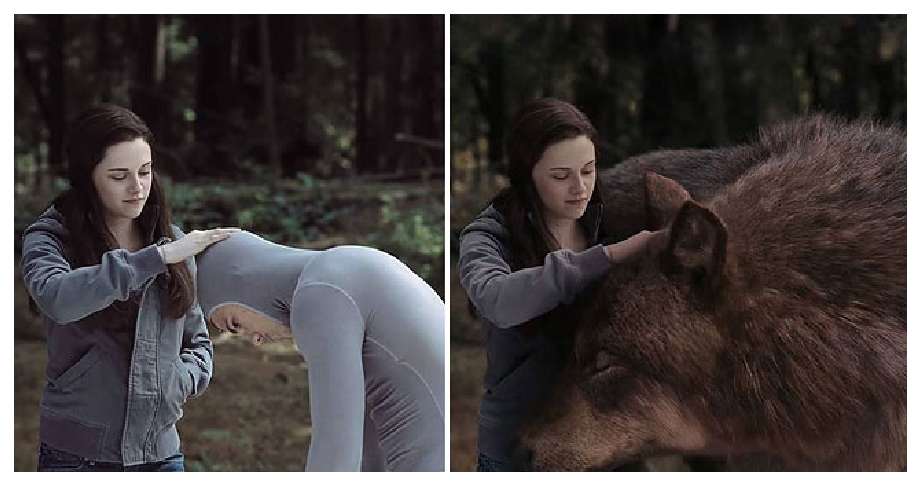

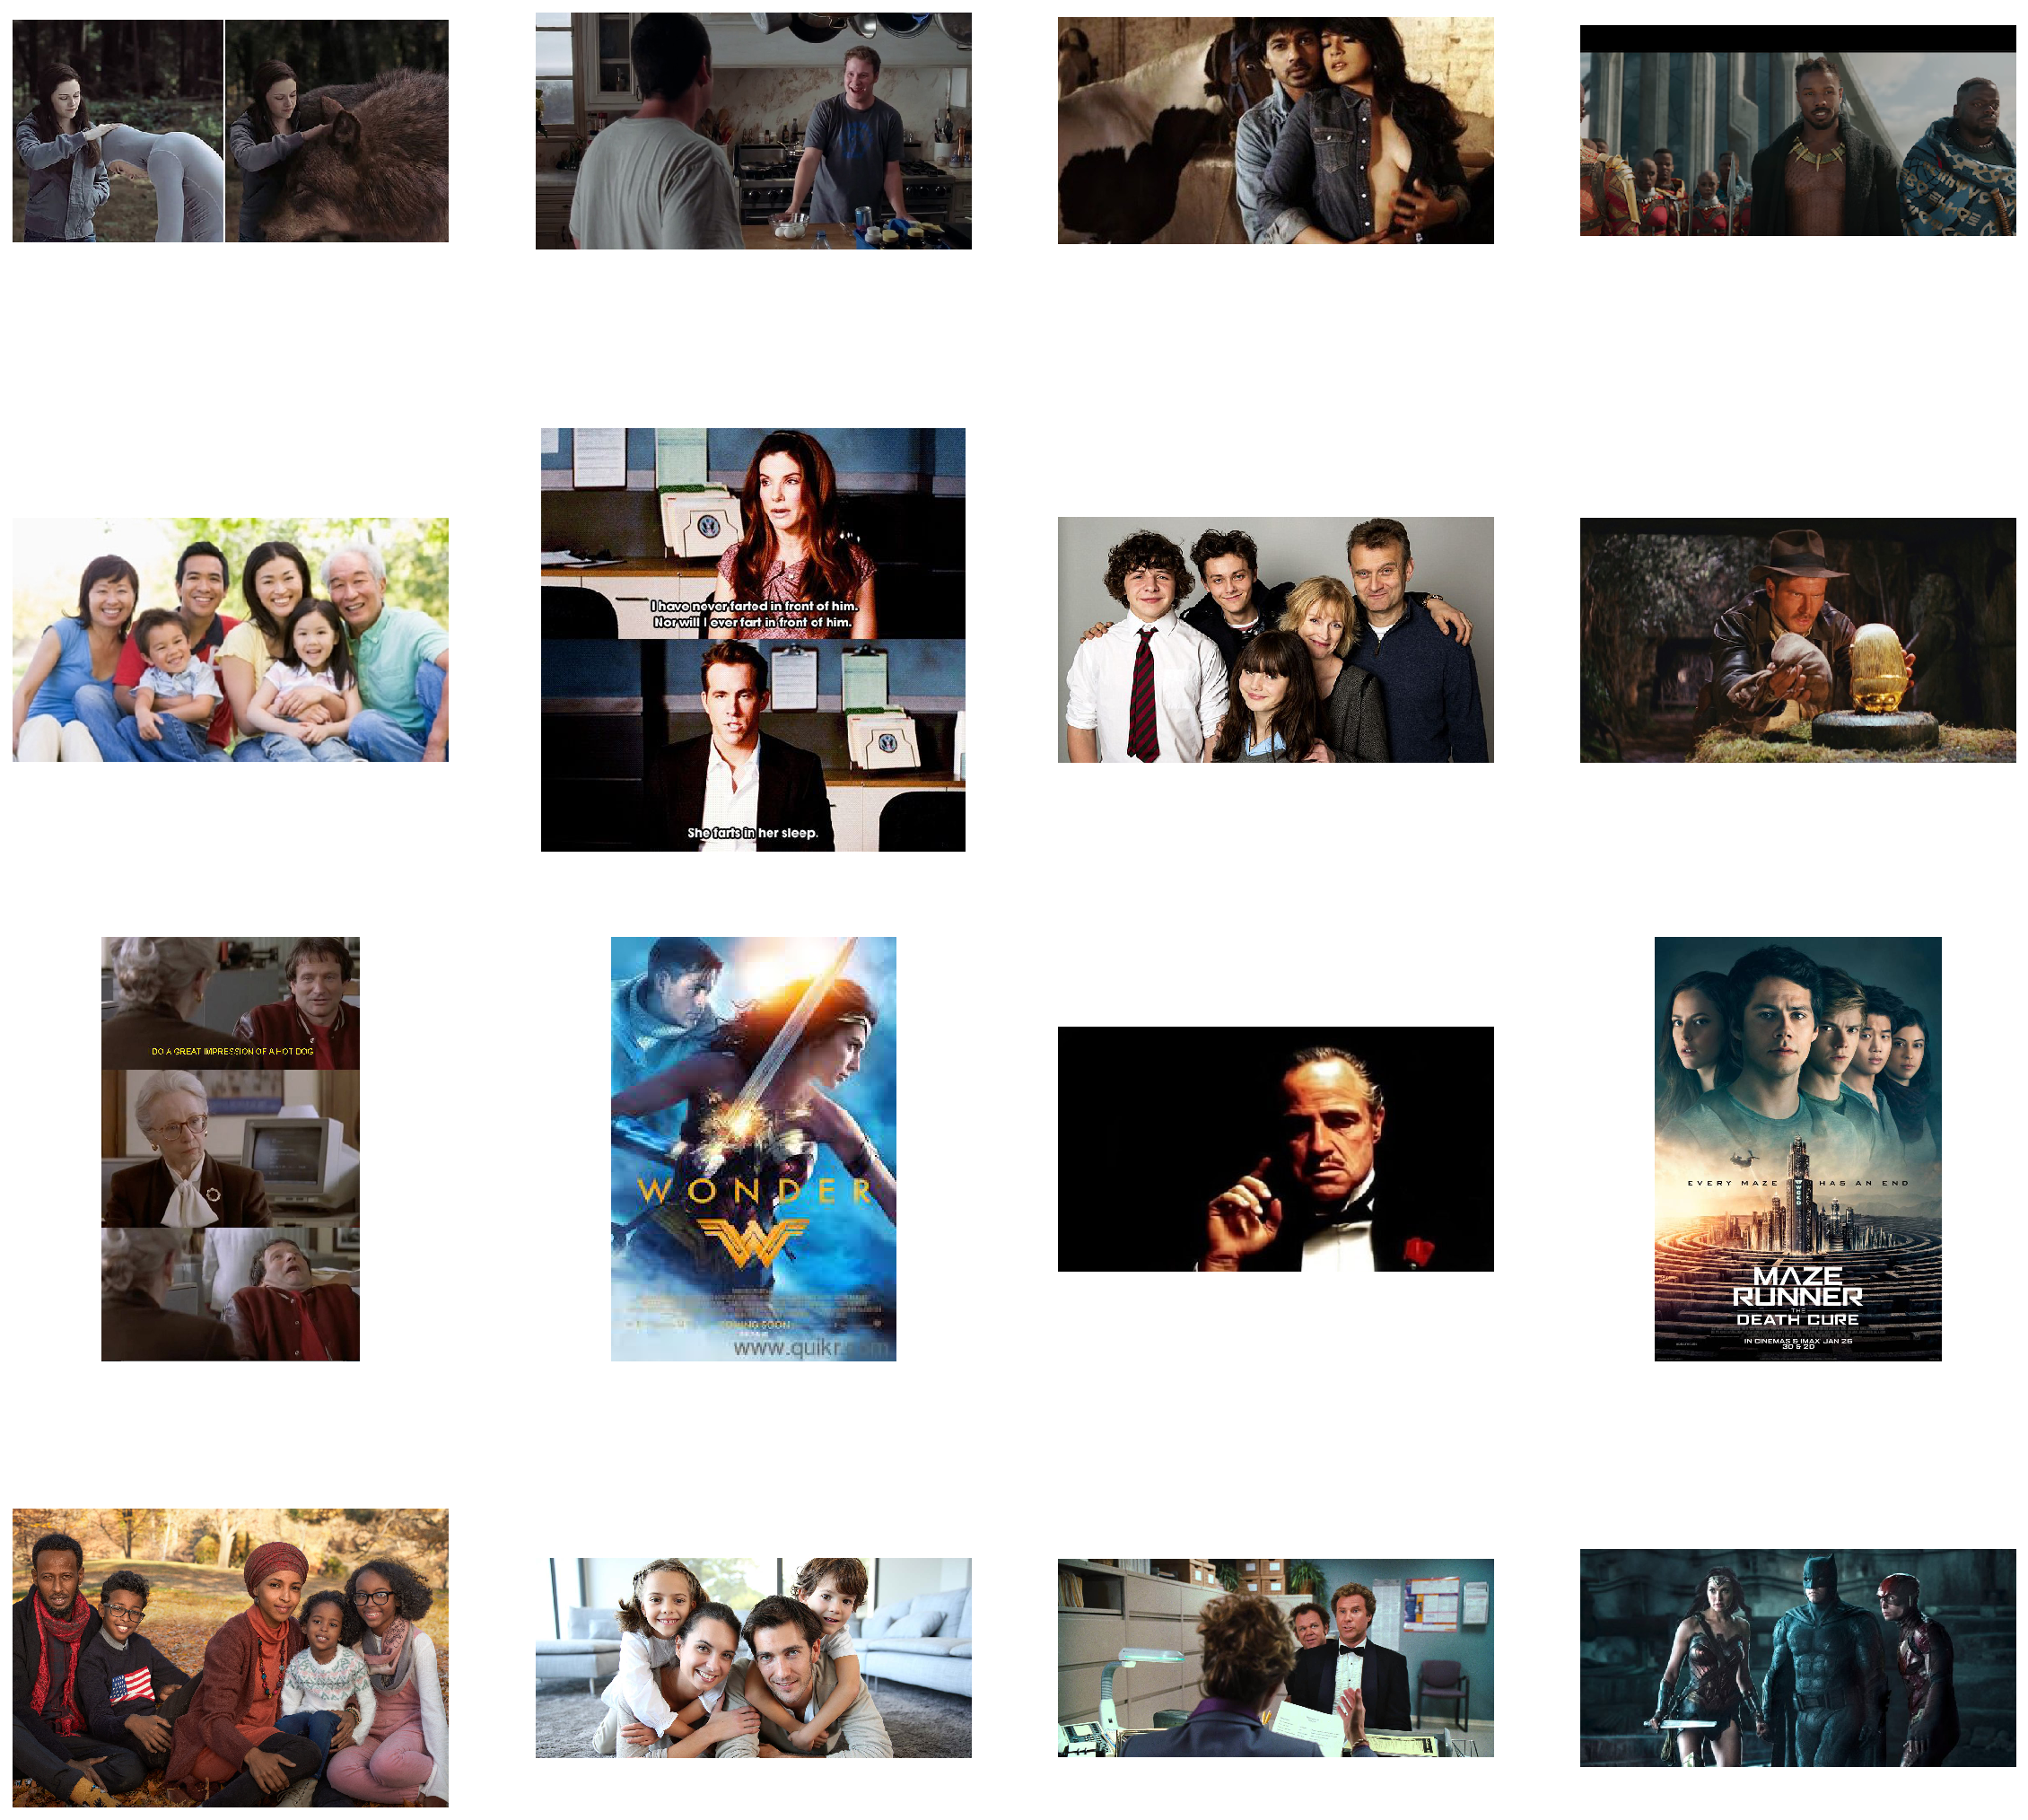

In [64]:


im = open_image(FACES_PATH/'faces_0.jpeg')
im.show(figsize=(8, 6))

imgs = []
for i in range(16):
    im = open_image(FACES_PATH/f'faces_{i}.jpeg')
    imgs.append(im)
    
show_all(imgs, r=4, figsize=(20, 20))
    

### View Images with Bounding Boxes

In [107]:

im.size[0], im.size[1]

(375, 750)

In [154]:
annotations_df = pd.read_csv(ANNOTATIONS_PATH); annotations_df.head()

file_name  width  height  x_min  y_min  x_max  y_max class_name
0  faces_0.jpeg    650     333     56    102    112    151       face
1  faces_0.jpeg    650     333    379     97    428    156       face
2  faces_1.jpeg   1280     697    903    162    985    252       face
3  faces_2.jpeg    460     240    216     12    279     80       face
4  faces_2.jpeg    460     240    289      2    343     74       face

In [245]:
classes= ['face']
bounding_box_color = (0, 255, 0)
bounding_box_thickness = 2

def load_image(img_name):
    img_path = str(FACES_PATH/f'{img_name}')
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def annotate_image(annotation_df, resize=True, debug=False):    
    image_name = annotation_df.file_name.to_numpy()[0]
    img = load_image(image_name)
    
    for i, a in annotation_df.iterrows():    
        cv2.rectangle(img, 
                     (a.x_min, a.y_min),
                     (a.x_max, a.y_max), bounding_box_color, bounding_box_thickness)
    
    if not resize: return img    
    return cv2.resize(img, (384, 384), interpolation=cv2.INTER_AREA)  
        
  


    

In [246]:
def show_image_with_annotation(annotation_df, resize=False):
    img = annotate_image(annotation_df, resize=resize)
    plt.imshow(img)
    plt.axis('off')
    
def show_image_grid(adf, debug=True):
    sample_images = [annotate_image(adf[adf.file_name == f])  for f in adf.file_name.unique()[:10]]  
    sample_images = torch.as_tensor(sample_images)

    if debug: print(f'[show_image_grid]: image.shape: {sample_images.shape}')
        
    sample_images = sample_images.permute(0, 3, 1, 2)
    
    plt.figure(figsize=(24, 12))    
    grid_img = torchvision.utils.make_grid(sample_images, nrow=5)    
    if debug: print(f'[show_image_grid]: grid_img.shape: {grid_img.shape}' )
    
    plt.imshow(grid_img.permute(1, 2, 0))
    plt.axis('off')

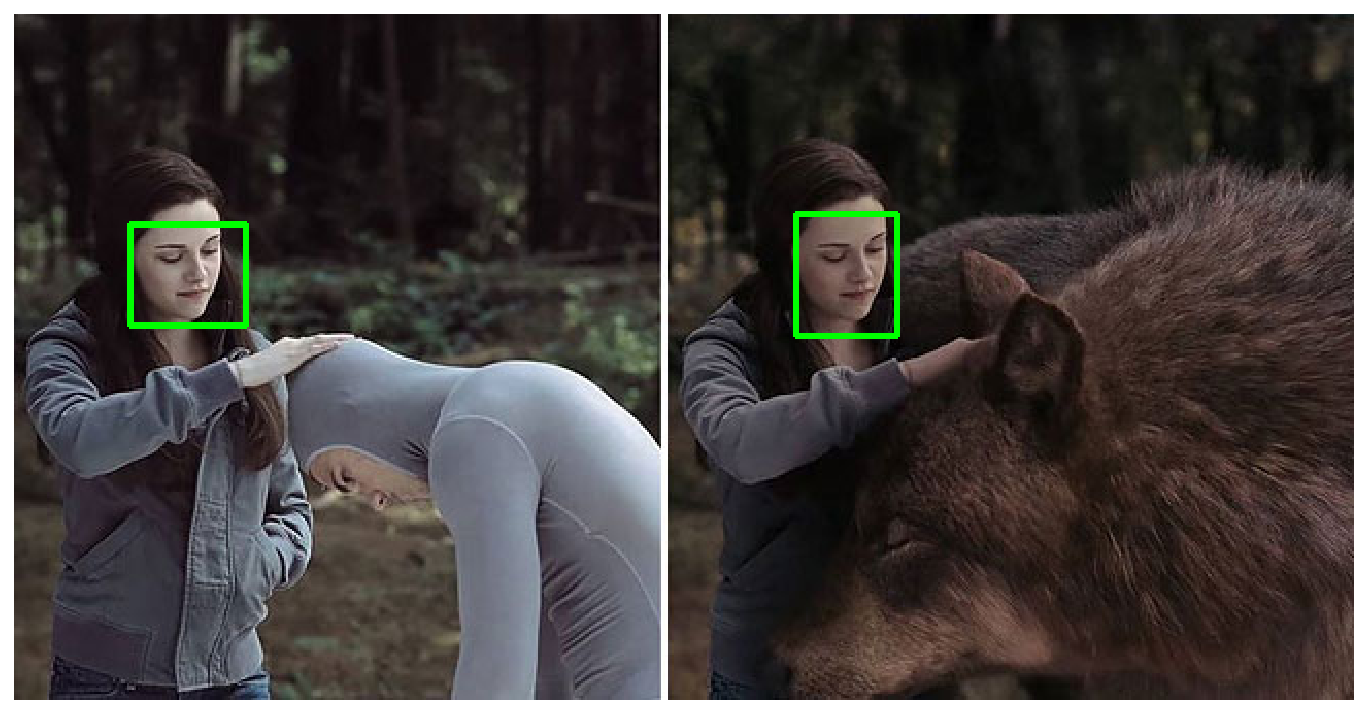

In [232]:
adf = annotations_df.copy()
show_image_with_annotation(adf[adf.file_name == 'faces_0.jpeg'], resize=False)

[show_image_grid]: image.shape: torch.Size([10, 384, 384, 3])
[show_image_grid]: grid_img.shape: torch.Size([3, 774, 1932])


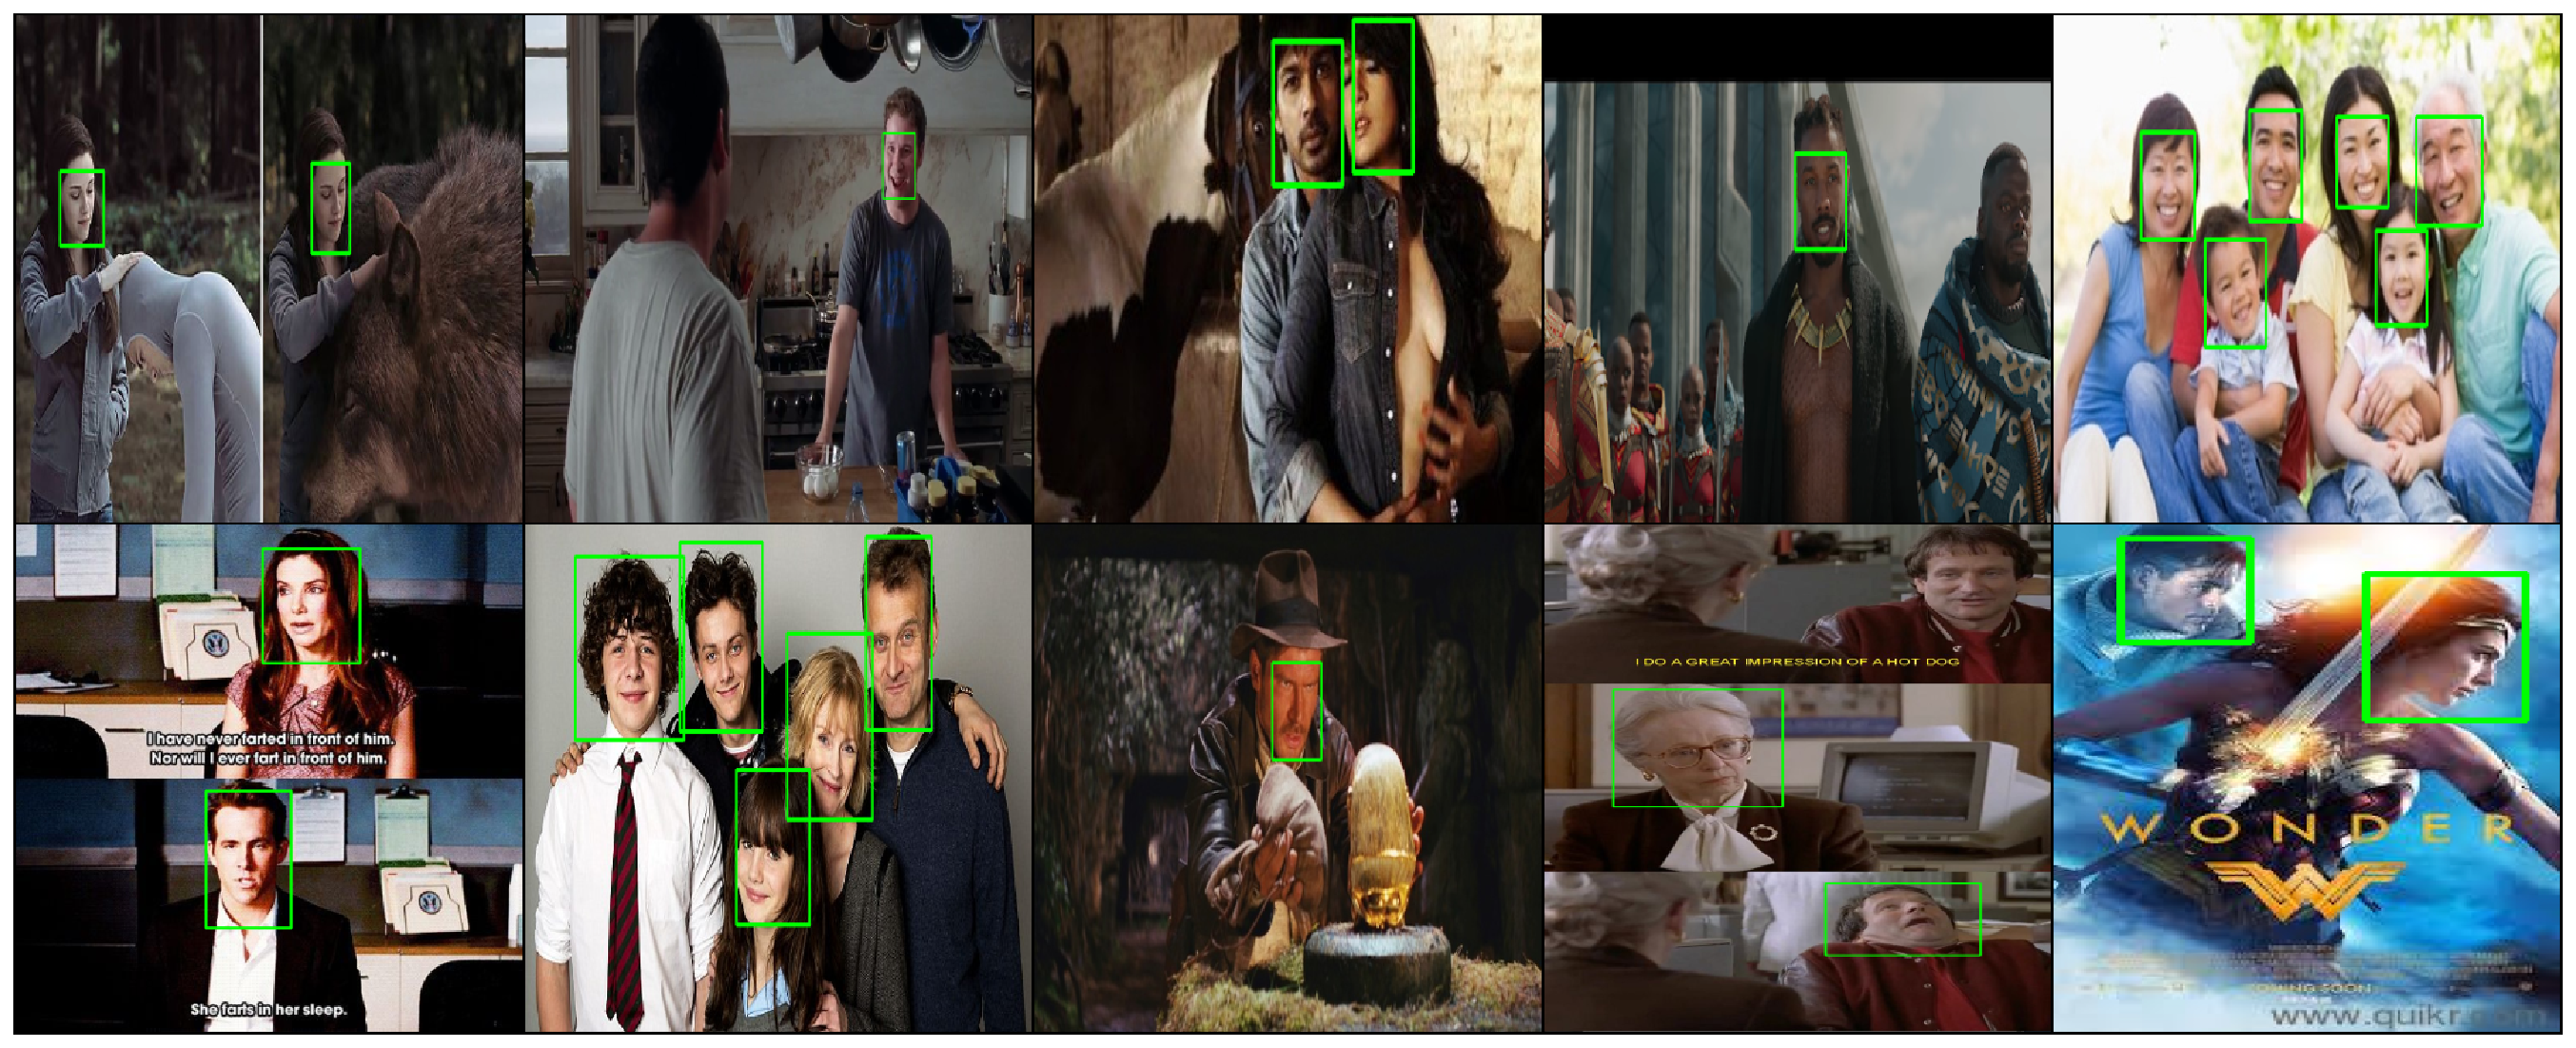

In [247]:
show_image_grid(adf)


### Create training and test datasets

1. Split the training set to 95%

In [13]:
df = pd.read_csv(ANNOTATIONS_PATH)
df.head()

file_name  width  height  x_min  y_min  x_max  y_max class_name
0  faces_0.jpeg    650     333     56    102    112    151       face
1  faces_0.jpeg    650     333    379     97    428    156       face
2  faces_1.jpeg   1280     697    903    162    985    252       face
3  faces_2.jpeg    460     240    216     12    279     80       face
4  faces_2.jpeg    460     240    289      2    343     74       face

In [14]:
unique_files = df.file_name.unique()

In [15]:
train_files = np.random.choice(unique_files, size=int(0.95 * len(unique_files)), replace=False)
train_files

array(['faces_172.jpeg', 'faces_137.jpeg', 'faces_126.jpeg', 'faces_94.jpeg', ..., 'faces_276.jpeg', 'faces_191.jpeg',
       'faces_385.jpeg', 'faces_293.jpeg'], dtype=object)

In [16]:
train_df = df[df.file_name.isin(train_files)]
train_df

file_name  width  height  x_min  y_min  x_max  y_max class_name
0       faces_0.jpeg    650     333     56    102    112    151       face
1       faces_0.jpeg    650     333    379     97    428    156       face
2       faces_1.jpeg   1280     697    903    162    985    252       face
3       faces_2.jpeg    460     240    216     12    279     80       face
4       faces_2.jpeg    460     240    289      2    343     74       face
...              ...    ...     ...    ...    ...    ...    ...        ...
1117  faces_404.jpeg   1280     720    220     14    767    611       face
1118  faces_405.jpeg   1280     720    778     66   1160    488       face
1119  faces_406.jpeg   1280     720    425      4    639    254       face
1120  faces_407.jpeg    935     514    189    182    293    318       face
1121  faces_407.jpeg    935     514    543    180    695    326       face

[1062 rows x 8 columns]

In [17]:
test_df = df[~df.file_name.isin(train_files)]
test_df

file_name  width  height  x_min  y_min  x_max  y_max class_name
50     faces_20.jpeg    480     360    239     75    377    248       face
182    faces_71.jpeg    425     282     32     33    112    123       face
183    faces_71.jpeg    425     282    111     89    163    166       face
184    faces_71.jpeg    425     282    159     33    210    113       face
185    faces_71.jpeg    425     282    214     53    274    129       face
...              ...    ...     ...    ...    ...    ...    ...        ...
1127  faces_408.jpeg    656     493    164    122    187    150       face
1128  faces_408.jpeg    656     493    318    115    346    159       face
1129  faces_408.jpeg    656     493    389    156    407    177       face
1130  faces_408.jpeg    656     493    507    204    526    226       face
1131  faces_408.jpeg    656     493    527    254    558    309       face

[70 rows x 8 columns]

In [18]:
classes = df.class_name.unique().tolist()
classes.index('face')

0

### Create a coco json format dataset

In [19]:


def create_dataset_dict(df, classes, debug=False):
    datasets_dict = []

    for image_id, img_name in enumerate(df.file_name.unique()):
        record = {}

        image_df = df[df.file_name == img_name]
        if debug: print(image_df)

        file_path = FACES_PATH/f'{img_name}'
        if debug: print(f'file_path: {file_path}')

        record['file_name'] = str(file_path)
        record['image_id'] = image_id
        record['height'] = int(image_df.iloc[0].height)
        record['width'] = int(image_df.iloc[0].width)

        objs= []

        for _, row in image_df.iterrows():

            xmin = int(row.x_min)
            ymin = int(row.y_min)
            xmax = int(row.x_max)
            ymax = int(row.y_max)

            poly = [
                (xmin, ymin), (xmax, ymin),
                (xmax, ymax), (xmin, ymax)
            ]

            poly = list(itertools.chain.from_iterable(poly))

            obj = {
              'bbox': [xmin, ymin, xmax, ymax],
              'bbox_mode': BoxMode.XYXY_ABS,
              'segmentation': [poly],
              'category_id': classes.index(row.class_name),
              'iscrowd': 0
            }

        objs.append(obj)
        record['annotations'] = objs
        datasets_dict.append(record)
    return datasets_dict



In [20]:
create_dataset_dict(train_df, classes)[:3]

[{'file_name': 'data/faces/faces_0.jpeg',
  'image_id': 0,
  'height': 333,
  'width': 650,
  'annotations': [{'bbox': [379, 97, 428, 156],
    'bbox_mode': <BoxMode.XYXY_ABS: 0>,
    'segmentation': [[379, 97, 428, 97, 428, 156, 379, 156]],
    'category_id': 0,
    'iscrowd': 0}]},
 {'file_name': 'data/faces/faces_1.jpeg',
  'image_id': 1,
  'height': 697,
  'width': 1280,
  'annotations': [{'bbox': [903, 162, 985, 252],
    'bbox_mode': <BoxMode.XYXY_ABS: 0>,
    'segmentation': [[903, 162, 985, 162, 985, 252, 903, 252]],
    'category_id': 0,
    'iscrowd': 0}]},
 {'file_name': 'data/faces/faces_2.jpeg',
  'image_id': 2,
  'height': 240,
  'width': 460,
  'annotations': [{'bbox': [289, 2, 343, 74],
    'bbox_mode': <BoxMode.XYXY_ABS: 0>,
    'segmentation': [[289, 2, 343, 2, 343, 74, 289, 74]],
    'category_id': 0,
    'iscrowd': 0}]}]

### DatasetCatalog

The `DatasetCatalog` is a Detectron's class used to tell it how to find a custom dataset. 

Internally, the registration process simply defines a function to associate it with the dataset type and calls the function to access the data. 

The data itself is just a `dict` called the `Standard Dataset Dict` which follows the [coco style json annotation representation](https://detectron2.readthedocs.io/tutorials/datasets.html#standard-dataset-dicts)


### MetadataCatalog

The `MetadataCatalog` is another `Detectron` class that tells it how to interpret a dataset. Example: the names of classes in an dataset.

It's a key-value mapping. It usually accompanies the DatasetCatalog registrations

```python
from detectron2.data import MetadataCatalog
MetadataCatalog.get("my_dataset").thing_classes = ["person", "dog"]
```

In [21]:
from functools import partial

train_ds = partial(create_dataset_dict, train_df, classes)
test_ds = partial(create_dataset_dict, test_df, classes)


In [22]:
DatasetCatalog.register('faces_train', train_ds)      
DatasetCatalog.register('faces_valid', test_ds)
    
MetadataCatalog.get('faces_train').set(thing_classes=classes)
MetadataCatalog.get('faces_valid').set(thing_classes=classes)

Metadata(name='faces_valid', thing_classes=['face'])

In [23]:
class CocoTrainer(DefaultTrainer):
  
    @classmethod  
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            os.makedirs('coco_eval', exist_ok=True)
            output_folder = 'coco_eval'
        return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [24]:
cfg = get_cfg()

In [25]:
#'COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml'

cfg.merge_from_file(
    model_zoo.get_config_file(
        'COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml'
    )
)

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    
    'COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml'
)

In [26]:
cfg.DATASETS.TRAIN = ('faces_train', )
cfg.DATASETS.TEST = ('faces_valid',)
cfg.DATALOADER.NUM_WORKERS = 4

In [27]:
cfg.SOLVER.IMS_PER_BATCH = 4 
cfg.SOLVER.BASE_LR = 0.001 
cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 1500
# The iteration number to decrease learning rate by GAMMA.
cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = (0.05)

In [28]:
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 16 
cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(classes)
cfg.TEST.EVAL_PERIOD = 500

In [29]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True) 

In [30]:
trainer = CocoTrainer(cfg)

[06/08 09:52:08 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[06/08 09:52:08 d2.data.build]: Removed 0 images with no usable annotations. 388 images left.
[06/08 09:52:08 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|    face    | 388          |
|            |              |
[06/08 09:52:08 d2.data.common]: Serializing 388 elements to byte tensors and concatenating them all ...
[06/08 09:52:08 d2.data.common]: Serialized dataset takes 0.10 MiB
[06/08 09:52:08 d2.data.detection_utils]: TransformGens used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[06/08 09:52:08 d2.data.build]: Using training sampler TrainingSampler


In [31]:
torch.cuda.empty_cache()

In [32]:
trainer.resume_or_load(resume=False)

model_final_a54504.pkl: 178MB [00:03, 55.2MB/s]                              
Unable to load 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model!
Unable to load 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model!
Unable to load 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model!
Unable to load 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model!
Unable to load 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in the model!
Unable to load 'roi_heads.mask_head.predictor.bias' to the model due to incompatible shapes: (80,) in the checkpoint but (1,) in the model!


In [ ]:
trainer.train()

[06/08 09:52:25 d2.engine.train_loop]: Starting training from iteration 0
[06/08 09:53:19 d2.utils.events]:  eta: 1:07:27  iter: 19  total_loss: 1.845  loss_cls: 0.698  loss_box_reg: 0.401  loss_mask: 0.686  loss_rpn_cls: 0.070  loss_rpn_loc: 0.010  time: 2.7282  data_time: 0.0117  lr: 0.000020  max_mem: 4992M
[06/08 09:54:14 d2.utils.events]:  eta: 1:07:32  iter: 39  total_loss: 1.726  loss_cls: 0.605  loss_box_reg: 0.438  loss_mask: 0.625  loss_rpn_cls: 0.061  loss_rpn_loc: 0.010  time: 2.7512  data_time: 0.0004  lr: 0.000040  max_mem: 4992M
[06/08 09:55:10 d2.utils.events]:  eta: 1:07:38  iter: 59  total_loss: 1.545  loss_cls: 0.482  loss_box_reg: 0.467  loss_mask: 0.518  loss_rpn_cls: 0.065  loss_rpn_loc: 0.009  time: 2.7659  data_time: 0.0004  lr: 0.000060  max_mem: 4992M
[06/08 09:56:05 d2.utils.events]:  eta: 1:06:01  iter: 79  total_loss: 1.358  loss_cls: 0.399  loss_box_reg: 0.400  loss_mask: 0.432  loss_rpn_cls: 0.050  loss_rpn_loc: 0.010  time: 2.7526  data_time: 0.0004  lr:

Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.05s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.099
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.374
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.003
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.061
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.022
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.155
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.129
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.343
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.386
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

[06/08 10:39:06 d2.data.common]: Serializing 21 elements to byte tensors and concatenating them all ...
[06/08 10:39:06 d2.data.common]: Serialized dataset takes 0.01 MiB
[06/08 10:39:06 d2.evaluation.evaluator]: Start inference on 21 images
[06/08 10:39:12 d2.evaluation.evaluator]: Inference done 11/21. 0.3771 s / img. ETA=0:00:04
[06/08 10:39:16 d2.evaluation.evaluator]: Total inference time: 0:00:06.500791 (0.406299 s / img per device, on 1 devices)
[06/08 10:39:16 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:06 (0.377639 s / img per device, on 1 devices)
[06/08 10:39:16 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[06/08 10:39:16 d2.evaluation.coco_evaluation]: Saving results to coco_eval/coco_instances_results.json
[06/08 10:39:16 d2.evaluation.coco_evaluation]: Evaluating predictions ...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE

[06/08 10:54:10 d2.utils.events]:  eta: 0:08:30  iter: 1319  total_loss: 0.833  loss_cls: 0.161  loss_box_reg: 0.410  loss_mask: 0.237  loss_rpn_cls: 0.002  loss_rpn_loc: 0.004  time: 2.7902  data_time: 0.0004  lr: 0.000050  max_mem: 4992M
[06/08 10:55:05 d2.utils.events]:  eta: 0:07:34  iter: 1339  total_loss: 0.860  loss_cls: 0.150  loss_box_reg: 0.436  loss_mask: 0.253  loss_rpn_cls: 0.002  loss_rpn_loc: 0.004  time: 2.7898  data_time: 0.0004  lr: 0.000050  max_mem: 4992M
[06/08 10:55:59 d2.utils.events]:  eta: 0:06:37  iter: 1359  total_loss: 0.868  loss_cls: 0.166  loss_box_reg: 0.436  loss_mask: 0.241  loss_rpn_cls: 0.003  loss_rpn_loc: 0.005  time: 2.7884  data_time: 0.0005  lr: 0.000050  max_mem: 4992M
[06/08 10:56:56 d2.utils.events]:  eta: 0:05:41  iter: 1379  total_loss: 0.881  loss_cls: 0.150  loss_box_reg: 0.432  loss_mask: 0.262  loss_rpn_cls: 0.004  loss_rpn_loc: 0.004  time: 2.7894  data_time: 0.0004  lr: 0.000050  max_mem: 4992M
[06/08 10:57:52 d2.utils.events]:  eta: 

In [33]:
t = torch.cuda.get_device_properties(0).total_memory
c = torch.cuda.memory_cached(0)
a = torch.cuda.memory_allocated(0)
f = c-a  # free inside cache

In [34]:
t, c, a, f

(11996954624, 201326592, 180829184, 20497408)

### Evaluation

In [ ]:
os.makedirs("annotated_results", exist_ok=True) 

In [ ]:
test_image_paths = test_df.file_name.unique()